In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
import seaborn as sns
import missingno as msno

In [9]:
data = pd.read_csv("data.csv")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


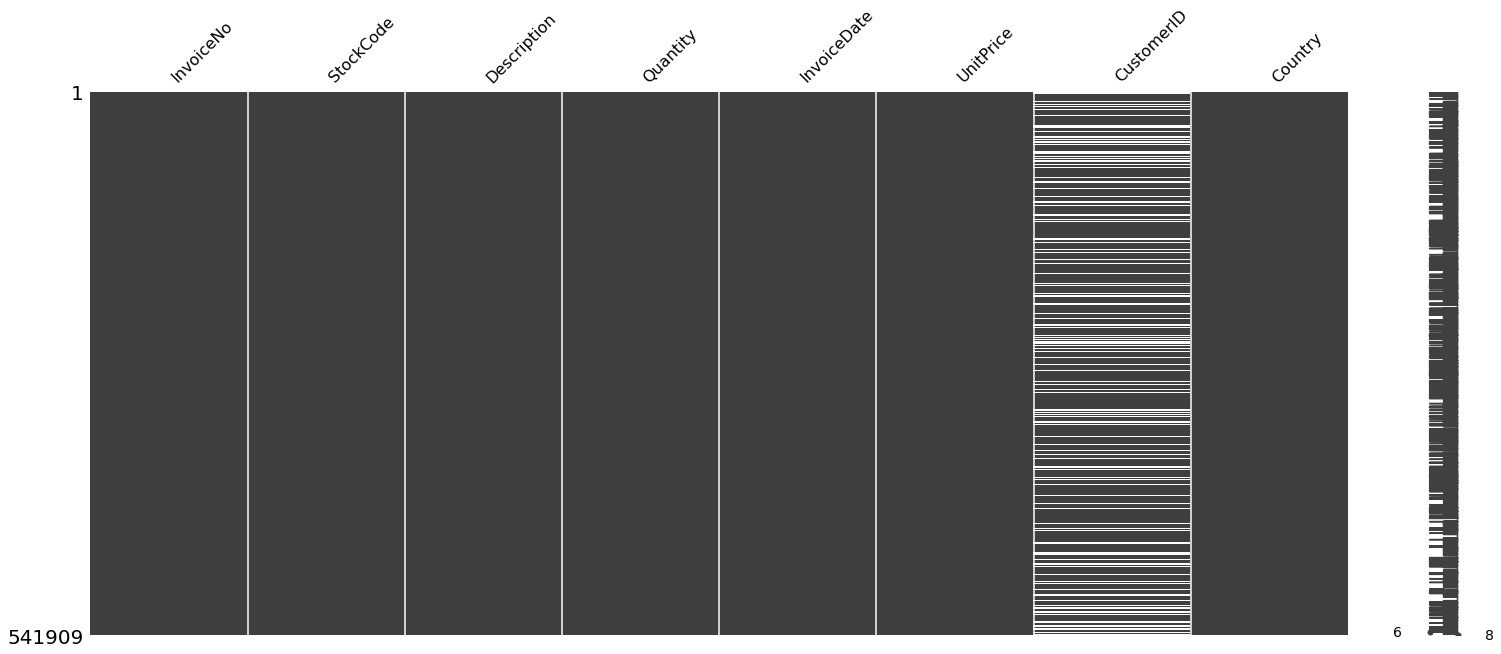

In [11]:
msno.matrix(data);

In [12]:
null_data = data[data.isnull().any(axis=1)] # remove missing values
null_data.shape

(135080, 8)

In [13]:
null_data_frac = null_data.shape[0]/data.shape[0]*100
null_data_frac
data = data.sort_values('Quantity', ascending=False)
data.head(11)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,11/25/2011 15:57,0.00,13256.0,United Kingdom
74614,542504,37413,NaN,5568,1/28/2011 12:03,0.00,NaN,United Kingdom
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,10/27/2011 12:26,0.21,12901.0,United Kingdom
206121,554868,22197,SMALL POPCORN HOLDER,4300,5/27/2011 10:52,0.72,13135.0,United Kingdom
220843,556231,85123A,?,4000,6/9/2011 15:04,0.00,NaN,United Kingdom
97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,2/22/2011 10:43,0.82,18087.0,United Kingdom
270885,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,7/19/2011 17:04,0.06,14609.0,United Kingdom
160546,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,4/18/2011 13:20,2.10,15749.0,United Kingdom


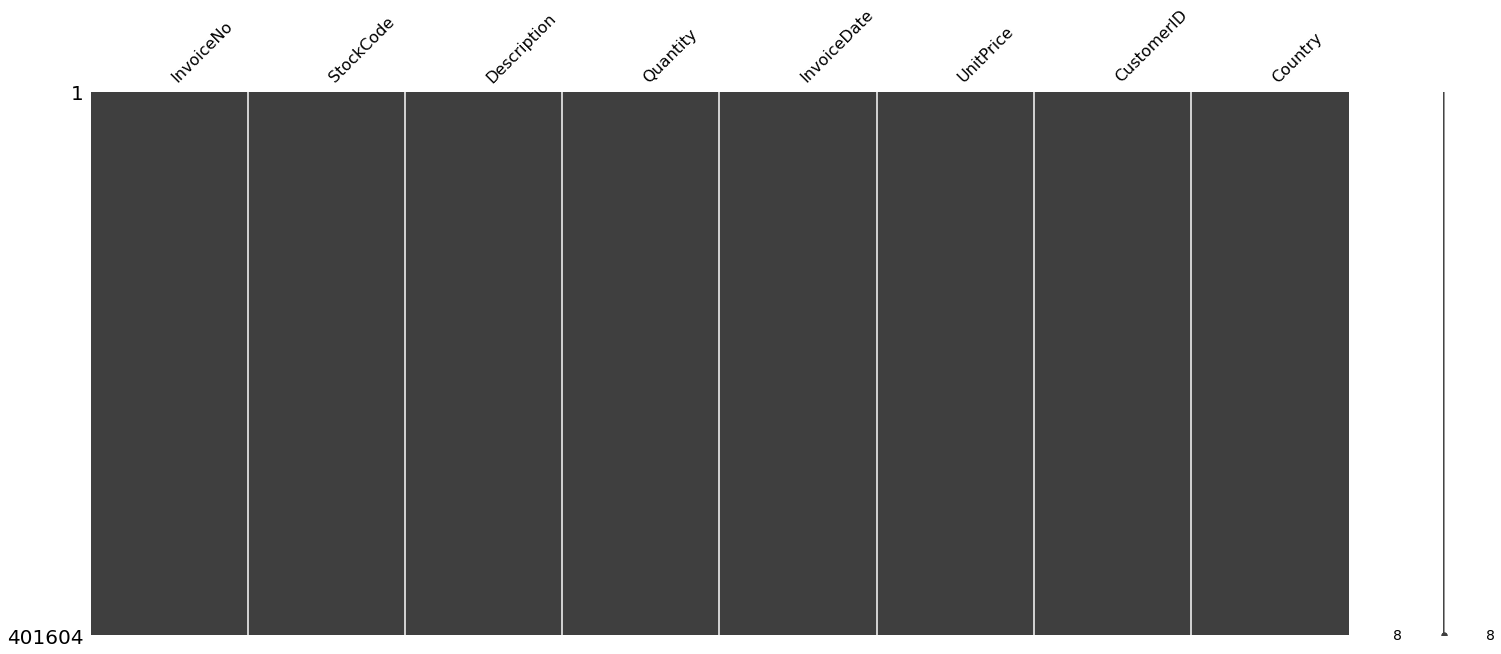

In [14]:
data = data.dropna()
data.drop_duplicates(inplace = True)
data.shape
msno.matrix(data);

In [15]:
data['Description'] = data['Description'].str.strip()
descriptors = pd.unique(data['Description'].values.ravel()).tolist()
print('There are',len(descriptors), 'Unique descriptors in the Descriptions column.')

There are 3885 Unique descriptors in the Descriptions column.


In [16]:
InvoiceNo = pd.unique(data['InvoiceNo'].values.ravel()).tolist()
by_country = data.groupby('Country')
by_country.describe()

Quantity                                               \
                         count       mean         std      min    25%   50%   
Country                                                                       
Australia               1258.0  66.488871   97.712803   -120.0   6.00  24.0   
Austria                  401.0  12.037406   21.745485    -48.0   6.00   9.0   
Bahrain                   17.0  15.294118   24.959379      2.0   6.00   6.0   
Belgium                 2069.0  11.189947   13.601441    -12.0   4.00  10.0   
Brazil                    32.0  11.125000    8.476723      2.0   3.00  10.0   
Canada                   151.0  18.298013   46.682587      1.0   6.00  12.0   
Channel Islands          757.0  12.513871   22.584559     -2.0   4.00  10.0   
Cyprus                   611.0  10.304419   23.444786    -33.0   2.00   5.0   
Czech Republic            30.0  19.733333   22.813990    -24.0  12.00  24.0   
Denmark                  389.0  21.048843   27.402502    -25.0  12.00  12.0   
EIRE                    7475.0  18.218997   42.040305   -288.0   4.00  10.0   
European Community        61.0   8.147541    6.546847     -2.0   3.00   6.0   
Finland                  695.0  15.346763   21.001421    -27.0   6.00  10.0   
France                  8475.0  12.956460   21.473831   -250.0   5.00  10.0   
Germany                 9480.0  12.377743   17.876026   -288.0   5.00  10.0   
Greece                   146.0  10.657534    7.724067     -1.0   5.25  10.0   
Iceland                  182.0  13.505495   18.856172      2.0   6.00  12.0   
Israel                   247.0  16.141700   16.749959    -32.0   4.00  12.0   
Italy                    803.0   9.961395   13.579809    -12.0   4.00   6.0   
Japan                    358.0  70.441341  177.191079   -624.0   4.00  36.0   
Lebanon                   45.0   8.577778    4.314294      2.0   6.00   8.0   
Lithuania                 35.0  18.628571   10.137542      6.0  12.00  16.0   
Malta                    127.0   7.433071    8.069726     -4.0   3.00   6.0   
Netherlands             2371.0  84.406580  111.369151   -480.0  16.00  72.0   
Norway                  1086.0  17.722836   22.644876    -12.0   6.00  12.0   
Poland                   341.0  10.712610   10.174628     -6.0   4.00  10.0   
Portugal                1471.0  10.888511   11.931942    -12.0   4.00  10.0   
RSA                       58.0   6.068966    3.329096      1.0   3.00   6.0   
Saudi Arabia              10.0   7.500000    5.720334     -5.0   6.00   9.0   
Singapore                229.0  22.855895   27.742886     -1.0   8.00  12.0   
Spain                   2528.0  10.607991   24.150780   -288.0   3.00   6.0   
Sweden                   461.0  77.292842  128.987626   -240.0   8.00  20.0   
Switzerland             1877.0  15.864678   19.293265   -120.0   6.00  12.0   
USA                      291.0   3.553265   16.450545    -36.0 -10.00   5.0   
United Arab Emirates      68.0  14.441176   12.474909      1.0   6.00  12.0   
United Kingdom        356728.0  11.198644  264.998044 -80995.0   2.00   4.0   
Unspecified              241.0   7.406639    8.925653      1.0   1.00   2.0   

                                     UnitPrice              ...        \
                        75%      max     count        mean  ...   75%   
Country                                                     ...         
Australia              96.0   1152.0    1258.0    3.217806  ...  3.75   
Austria                12.0    288.0     401.0    4.243192  ...  4.15   
Bahrain                 8.0     96.0      17.0    4.644118  ...  4.95   
Belgium                12.0    272.0    2069.0    3.644335  ...  4.15   
Brazil                 18.0     24.0      32.0    4.456250  ...  6.75   
Canada                 20.0    504.0     151.0    6.030331  ...  2.95   
Channel Islands        12.0    407.0     757.0    4.936460  ...  6.25   
Cyprus                 12.0    288.0     611.0    6.350311  ...  4.95   
Czech Republic         24.0     72.0      30.0    2.938333

In [22]:
temp = data.groupby(by=['CustomerID'], as_index=False)['InvoiceDate'].count()
products_per_basket = temp.rename(columns = {'InvoiceDate':'Number of products'})
top_baskets = products_per_basket.sort_values('Number of products', ascending=False)
top_baskets.head(10)

,CustomerID,Number of products
4042,17841.0,7812
1895,14911.0,5898
1300,14096.0,5128
330,12748.0,4459
1674,14606.0,2759
2192,15311.0,2478
1703,14646.0,2085
568,13089.0,1853
698,13263.0,1667
1447,14298.0,1640


In [23]:
top_basket = data[data['CustomerID'] == top_baskets['CustomerID'].iloc[0]]

In [27]:
features_num = ["Quantity"]
data[features_num].describe()

,Quantity
count,401604.000000
mean,12.183273
std,250.283037
min,-80995.000000
25%,2.000000
50%,5.000000
75%,12.000000
max,80995.000000
